In [2]:
import pandas as pd
import numpy as np
import sys
import geopandas as gpd

df = pd.read_csv("Data/Zip_Summary.csv")
df.head()

,num_state,na_count,num_zip,tot_build,mu_total_site_energy,med_total_site_energy,mu_total_source_energy,med_total_source_energy,mu_eui,med_eui,...,total_heating_fuel_type_Wood,total_heating_system_type_GEOTHERMAL,total_heating_system_type_OIL,total_heating_system_type_STEAM,total_cooling_system_type_GT,total_heating_system_type_VENT,total_cooling_system_type_CW,total_heating_system_type_COAL,total_heating_fuel_type_Coal,total_heating_system_type_ZONE
0,MA,0,1001,5510,1244.612139,833.559998,2957.833142,1844.339966,505.041867,445.928150,...,11,0,0,593,0,0,0,0,0,0
1,MA,0,1002,5400,1386.850267,1045.270020,3241.716690,2409.959961,554.378947,534.918088,...,0,18,0,499,0,0,0,0,0,0
2,MA,0,1005,1830,777.404929,597.460022,1661.468308,1077.750000,424.787104,346.773002,...,0,1,0,105,0,0,0,0,0,0
3,MA,0,1007,4765,1298.621933,973.700012,3058.635880,2328.830078,573.620994,554.178384,...,19,0,0,82,0,0,0,0,0,0
4,MA,0,1008,531,1385.888021,867.280029,3230.697317,2125.919922,613.905523,576.398806,...,7,0,0,25,0,0,0,0,0,0


In [3]:
# Filter to state ME

df = df[df['num_state'] == 'PA']

df

,num_state,na_count,num_zip,tot_build,mu_total_site_energy,med_total_site_energy,mu_total_source_energy,med_total_source_energy,mu_eui,med_eui,...,total_heating_fuel_type_Wood,total_heating_system_type_GEOTHERMAL,total_heating_system_type_OIL,total_heating_system_type_STEAM,total_cooling_system_type_GT,total_heating_system_type_VENT,total_cooling_system_type_CW,total_heating_system_type_COAL,total_heating_fuel_type_Coal,total_heating_system_type_ZONE
2579,PA,0,15424,1103,1812.059147,814.169983,4234.362073,2006.790039,574.496321,505.828998,...,0,0,481,0,0,0,0,52,52,0
2580,PA,0,15501,6844,1019.447931,662.669983,2362.470261,1296.160034,439.586022,365.713621,...,0,0,4277,0,0,0,0,371,371,0
2581,PA,0,15531,1621,1025.244005,749.059998,2359.992573,1577.709961,492.900959,432.393319,...,0,0,1103,0,0,0,0,39,39,0
2582,PA,0,15541,1912,855.556861,634.320007,1974.129276,1266.380005,485.498062,390.252081,...,0,0,1228,0,0,0,0,87,87,0
2583,PA,0,15552,2601,1184.500765,811.330017,2823.391422,1894.609985,540.891821,498.416018,...,0,0,1857,0,0,0,0,95,95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,PA,0,16140,35,1154.762285,799.210022,2879.552263,1986.630005,628.690779,680.947394,...,0,0,0,0,0,0,0,0,0,0
25719,PA,0,16430,81,687.738891,567.679993,1528.441232,1059.050049,473.699623,405.506916,...,0,0,0,0,0,0,0,0,0,0
25720,PA,0,16622,66,1177.052721,1019.789978,2945.200440,2749.639893,566.705249,510.860494,...,0,0,0,0,0,0,0,0,0,0
25721,PA,0,17239,79,1105.241522,719.099976,2571.438317,1558.260010,532.986678,447.505489,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cjest = pd.read_csv("Data/CEJST_county.csv")
cjest.dropna(subset=['GEOID'] , inplace= True)
cjest['GEOID'] = cjest['GEOID'].astype('int')
cjest.head()

,GEOID,STATE,COUNTY,TOTAL_POPULATION,DISADVANTAGED_POPULATION,PCT_DISADVANTAGED
1,19099,Iowa,Jasper County,36971.0,6549.0,0.177139
2,19111,Iowa,Lee County,34227.0,6248.0,0.182546
3,19061,Iowa,Dubuque County,96982.0,10943.0,0.112835
4,19171,Iowa,Tama County,17032.0,3691.8,0.216757
5,19023,Iowa,Butler County,14628.0,1895.0,0.129546


In [5]:
# Perform the left join
result = pd.merge(df, cjest, left_on='num_zip', right_on='GEOID', how='left')


In [6]:
result.head()

,num_state,na_count,num_zip,tot_build,mu_total_site_energy,med_total_site_energy,mu_total_source_energy,med_total_source_energy,mu_eui,med_eui,...,total_cooling_system_type_CW,total_heating_system_type_COAL,total_heating_fuel_type_Coal,total_heating_system_type_ZONE,GEOID,STATE,COUNTY,TOTAL_POPULATION,DISADVANTAGED_POPULATION,PCT_DISADVANTAGED
0,PA,0,15424,1103,1812.059147,814.169983,4234.362073,2006.790039,574.496321,505.828998,...,0,52,52,0,NaN,NaN,NaN,NaN,NaN,NaN
1,PA,0,15501,6844,1019.447931,662.669983,2362.470261,1296.160034,439.586022,365.713621,...,0,371,371,0,NaN,NaN,NaN,NaN,NaN,NaN
2,PA,0,15531,1621,1025.244005,749.059998,2359.992573,1577.709961,492.900959,432.393319,...,0,39,39,0,NaN,NaN,NaN,NaN,NaN,NaN
3,PA,0,15541,1912,855.556861,634.320007,1974.129276,1266.380005,485.498062,390.252081,...,0,87,87,0,NaN,NaN,NaN,NaN,NaN,NaN
4,PA,0,15552,2601,1184.500765,811.330017,2823.391422,1894.609985,540.891821,498.416018,...,0,95,95,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
result.columns

Index(['num_state', 'na_count', 'num_zip', 'tot_build', 'mu_total_site_energy',
       'med_total_site_energy', 'mu_total_source_energy',
       'med_total_source_energy', 'mu_eui', 'med_eui', 'mu_area_sq_ft',
       'med_area_sq_ft', 'year_built_na_count', 'mean_year_built', 'cat_state',
       'cat_zip', 'total_cooling_system_type_CE',
       'total_cooling_system_type_miss', 'total_cooling_system_type_NO',
       'total_cooling_system_type_NONE', 'total_cooling_system_type_OT',
       'total_cooling_system_type_PA', 'total_cooling_system_type_RF',
       'total_ee_potential_score_EE_HIGH', 'total_ee_potential_score_EE_LOW',
       'total_ee_potential_score_EE_MED', 'total_ee_potential_score_miss',
       'total_heating_system_type_CENTRAL',
       'total_heating_system_type_FLOOR_WALL',
       'total_heating_system_type_FORCED_AIR',
       'total_heating_system_type_GRAVITY', 'total_heating_system_type_miss',
       'total_heating_system_type_NONE', 'total_heating_system_type_OTHER'

In [73]:
result = result[['num_zip' , 'mu_eui', 'PCT_DISADVANTAGED']]

In [74]:
result = result.dropna(subset=['PCT_DISADVANTAGED'])
result = result[(result['PCT_DISADVANTAGED'] > 0) & (result['PCT_DISADVANTAGED'] < 1)]
result

,num_zip,mu_eui,PCT_DISADVANTAGED
56,16051,562.699168,0.127742
57,16057,582.419628,0.100899
196,17007,318.464552,0.381437
199,17013,272.467676,0.548861
200,17015,313.166696,0.209318
...,...,...,...
1853,19039,490.065853,0.549038
1863,17061,392.904001,0.134481
1879,18065,268.311192,0.240659
1886,17103,372.545885,0.100672


<AxesSubplot: xlabel='PCT_DISADVANTAGED', ylabel='mu_eui'>

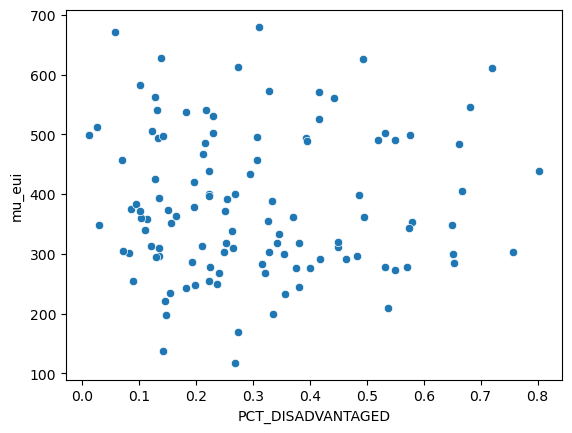

In [75]:
import seaborn as sns

# Specify the column names correctly
x_column = 'PCT_DISADVANTAGED'
y_column = 'mu_eui'

# Create the scatter plot
sns.scatterplot(x=x_column, y=y_column, data=result)
